### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow import keras
from sklearn.model_selection import cross_val_score

from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense, Activation, Dropout, BatchNormalization

### Load data

In [2]:
df = pd.read_csv('merged_df.csv')

In [3]:
df.shape

(12811, 18)

### One-hot encoding of categorical variables - gender, ethnicity

In [4]:
df = pd.get_dummies(df)

In [5]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity_Bengali',
       'ethnicity_English', 'ethnicity_Han Chinese', 'gender_F', 'gender_M'],
      dtype='object')

### Train-test Split 
- Train-test split of 85-15% done
- Train-val split of 82-18% done so that validation data size is almost equivalent to test dataset which could help to generalize model well.


In [6]:
df.reset_index(drop=True, inplace=True)
y = df['user-definedlabeln']
X = df.drop(['SubjectID', 'VideoID','predefinedlabel', 'user-definedlabeln'], axis=1)

X.columns, len(X.columns)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, stratify=y)
X_train2,X_val,y_train2,y_val = train_test_split(X_train,y_train, test_size=0.18, stratify=y_train)
X_train2.shape,X_val.shape, X_test.shape

((8928, 17), (1961, 17), (1922, 17))

### Data Scaling

In [7]:
cols_to_be_scaled = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
        'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age']

sc = StandardScaler() 
X_train2[cols_to_be_scaled]= sc.fit_transform(X_train2[cols_to_be_scaled])
X_val[cols_to_be_scaled] = sc.transform(X_val[cols_to_be_scaled])
X_test[cols_to_be_scaled] = sc.transform(X_test[cols_to_be_scaled])

<ipython-input-7-2f29ebd4658c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train2[cols_to_be_scaled]= sc.fit_transform(X_train2[cols_to_be_scaled])
C:\Users\Palak\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-7-2f29ebd4658c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### MLP Model Architecture

- After lot of experimentation parameters for the models are selected.

In [8]:
from tensorflow.keras.models import Sequential

def mlp_model():
    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs
    model = Sequential()
    model.add(InputLayer(input_shape=(17,)))
    # First hidden layer
    model.add(Dense(units=512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Second hidden layer
    model.add(Dense(units=256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Dense(units=32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    #  Output layer with 1 sigmoid unit as we ll have binary classifier
    model.add(Dense(1,activation='sigmoid') )

    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')
    
    return model 

In [9]:
X_train2.shape, X_val.shape, X_test.shape

((8928, 17), (1961, 17), (1922, 17))

In [10]:
model =  mlp_model()
#Fitting the model
history=model.fit(X_train2,y_train2,validation_data=(X_val,y_val),batch_size=128,epochs=80 )

Epoch 1/80
70/70 [==============================] - 3s 14ms/step - loss: 0.7004 - accuracy: 0.5813 - val_loss: 0.6525 - val_accuracy: 0.6201
Epoch 2/80
70/70 [==============================] - 1s 9ms/step - loss: 0.6505 - accuracy: 0.6191 - val_loss: 0.6506 - val_accuracy: 0.6252
Epoch 3/80
70/70 [==============================] - 1s 8ms/step - loss: 0.6410 - accuracy: 0.6342 - val_loss: 0.6455 - val_accuracy: 0.6308
Epoch 4/80
70/70 [==============================] - 1s 9ms/step - loss: 0.6323 - accuracy: 0.6434 - val_loss: 0.6328 - val_accuracy: 0.6344
Epoch 5/80
70/70 [==============================] - 1s 9ms/step - loss: 0.6258 - accuracy: 0.6520 - val_loss: 0.6403 - val_accuracy: 0.6384
Epoch 6/80
70/70 [==============================] - 1s 8ms/step - loss: 0.6237 - accuracy: 0.6522 - val_loss: 0.6262 - val_accuracy: 0.6507
Epoch 7/80
70/70 [==============================] - 1s 10ms/step - loss: 0.6204 - accuracy: 0.6550 - val_loss: 0.6280 - val_accuracy: 0.6543
Epoch 8/80
70/70 [

Epoch 59/80
70/70 [==============================] - 1s 14ms/step - loss: 0.5273 - accuracy: 0.7278 - val_loss: 0.5860 - val_accuracy: 0.6910
Epoch 60/80
70/70 [==============================] - 1s 14ms/step - loss: 0.5206 - accuracy: 0.7375 - val_loss: 0.6017 - val_accuracy: 0.6741
Epoch 61/80
70/70 [==============================] - 1s 13ms/step - loss: 0.5242 - accuracy: 0.7304 - val_loss: 0.5865 - val_accuracy: 0.6711
Epoch 62/80
70/70 [==============================] - 1s 14ms/step - loss: 0.5240 - accuracy: 0.7366 - val_loss: 0.6200 - val_accuracy: 0.6879
Epoch 63/80
70/70 [==============================] - 1s 14ms/step - loss: 0.5201 - accuracy: 0.7407 - val_loss: 0.6205 - val_accuracy: 0.6777
Epoch 64/80
70/70 [==============================] - 1s 14ms/step - loss: 0.5150 - accuracy: 0.7385 - val_loss: 0.6043 - val_accuracy: 0.6777
Epoch 65/80
70/70 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.73 - 1s 15ms/step - loss: 0.5168 - accuracy: 0.7371 - val_

In [11]:
test_loss, test_acc = model.evaluate(X_test,y_test)
test_acc

61/61 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.6941


0.6940686702728271

### Observations:-
- Train accuracy: ~75
- Val accuracy : ~69
- Test accuracy: ~69
- Model seems to be overfitted

## MLP with Stratified K-fold Cross-Validation Technique
Aim: To reduce overfitting

In [14]:
10889/6

# Train data size - 10889
# Validation data size - 1814 which is closest to test data size of ~1900

1814.8333333333333

### 6-Fold Cross-validation:
- Training data is splitted into 6 folds where 5 folds will be kept for training and model will be evaluated on 1 fold for each of the folds.

- Aiming to reduce overfitting using this technique as whole training data will be utilized for training data.
- Model performance will be evaluated on test data which is not utilized in training data

In [15]:
from sklearn.model_selection import cross_validate
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

model2 = KerasClassifier(build_fn= mlp_model, epochs=30, batch_size=128)

kfold = StratifiedKFold(n_splits=6)
scores = cross_val_score(model2, X_train, y_train, cv=kfold)

history  = model2.fit(X_train,y_train)

Epoch 1/30
71/71 [==============================] - 2s 9ms/step - loss: 0.7022 - accuracy: 0.5872
Epoch 2/30
71/71 [==============================] - 1s 16ms/step - loss: 0.6501 - accuracy: 0.6272
Epoch 3/30
71/71 [==============================] - 1s 10ms/step - loss: 0.6420 - accuracy: 0.6329
Epoch 4/30
71/71 [==============================] - 1s 9ms/step - loss: 0.6308 - accuracy: 0.6465
Epoch 5/30
71/71 [==============================] - 1s 9ms/step - loss: 0.6315 - accuracy: 0.6461
Epoch 6/30
71/71 [==============================] - 1s 9ms/step - loss: 0.6247 - accuracy: 0.6518
Epoch 7/30
71/71 [==============================] - 1s 9ms/step - loss: 0.6189 - accuracy: 0.6537
Epoch 8/30
71/71 [==============================] - 1s 9ms/step - loss: 0.6194 - accuracy: 0.6551
Epoch 9/30
71/71 [==============================] - 1s 9ms/step - loss: 0.6143 - accuracy: 0.6565
Epoch 10/30
71/71 [==============================] - 1s 9ms/step - loss: 0.6079 - accuracy: 0.6655
Epoch 11/30
71/71

In [17]:
print("validation accuracies: ", scores)
scores.mean()

validation accuracies:  [0.68154269 0.6584022  0.68539947 0.67713499 0.70247936 0.6786108 ]


0.6805949211120605

### Model Evaluation

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def model_evaluation(data,true_label, model):
    y_pred = model.predict(data)
    y_pred = np.array(y_pred >= 0.5, dtype = np.int)
    print(confusion_matrix(true_label, y_pred))
    print(accuracy_score(true_label, y_pred))
    

In [19]:
model_evaluation(X_train,y_train, model2)
model_evaluation(X_test,y_test,model2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[[4090 1217]
 [1978 3604]]
0.7065846266874828
[[701 236]
 [369 616]]
0.6852237252861603


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


### Observations:-
- Train accuracy of ~70% achieved.
- Test accuracy of ~68% achieved.
- Kfold cross-validation yielded pretty generalized model as difference between train and test accuracy is very low.


## Model 2: LSTM

- Data set contains data of 10 students watching 10 videos.
- Here data of each student-video is sampled at 0.5s, so on an avg we have 120 rows.
- Idea: We can consider data of 1 video as whole timeseries. LSTM model works well when there is time axis involded in the data.

### LSTM Input preparation

- For LSTM input we need to fix timesteps. 
- Video which will be having max number of rows will be considered as timesteps for lstm model.

In [20]:
df.groupby(['SubjectID','VideoID']).size().max()

144

### Observations
- For student - video combination we have max of 144 rows data which is equivalent to 72s.
- So max length for lstm input will be 144.
- Those videos who do not have 144 rows will be padded.

In [21]:
def padding(grp):
    '''
    Input: Get each grp - student-video data
    Drop unnecessary columns: SubjectID', 'VideoID','predefinedlabel', 'user-definedlabeln
    Add padding rows to those grp whose max_length < 144.
    Output: modified grp (type numpy array)
    '''
    grp = grp.drop(['SubjectID', 'VideoID','predefinedlabel', 'user-definedlabeln'], axis=1)
    max_length = 144
    grp_length = grp.shape[0] # number of rows for this student-video data
    padding_list = [0]* grp.shape[1] # [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    num_padding_rows = max_length - grp_length 
    #print(num_padding_rows, grp_length)
    padding_array = pd.DataFrame([padding_list]*num_padding_rows, columns=grp.columns)
    #print(padding_array.shape)
    grp = pd.concat([grp,padding_array], axis=0, ignore_index=True)

    
    return grp.values# return numpy array
    

In [23]:
df.groupby(['SubjectID','VideoID']).apply(padding)

SubjectID  VideoID
0.0        0.0        [[56.0, 43.0, 278.0, 301963.0, 90612.0, 33735....
           1.0        [[47.0, 23.0, -58.0, 587813.0, 276755.0, 47356...
           2.0        [[44.0, 69.0, -1.0, 118962.0, 35777.0, 3854.0,...
           3.0        [[20.0, 56.0, 9.0, 399799.0, 14845.0, 12363.0,...
           4.0        [[40.0, 54.0, -151.0, 537373.0, 92910.0, 48431...
                                            ...                        
9.0        5.0        [[0.0, 0.0, 90.0, 281282.0, 90754.0, 13144.0, ...
           6.0        [[16.0, 67.0, -54.0, 1019053.0, 48412.0, 39998...
           7.0        [[23.0, 61.0, 307.0, 325528.0, 48218.0, 26334....
           8.0        [[64.0, 74.0, 134.0, 1715933.0, 414358.0, 2668...
           9.0        [[51.0, 38.0, -109.0, 715551.0, 29209.0, 5463....
Length: 100, dtype: object

### Applying Padding

In [24]:
data = np.array(df.groupby(['SubjectID','VideoID']).apply(padding).values.tolist())
y = df.groupby(['SubjectID','VideoID'])['user-definedlabeln'].first().values

data.shape, y.shape

((100, 144, 17), (100,))

### Observation:-
- Dataset of 100 rows, 144 timesteps and 17 features is created.

### Train-Test Split

- 90-10% train-test split is selected.
- We will consider test split as validation split only and evaluate model on same as size of dataset is already very low.

In [25]:
index = pd.Series(range(0,100)) # 0-100 index range
test_index = index.sample(frac=0.1) # Sample randomly 10% of index as test index
train_index = list(set(list(range(0,100))) - set(test_index.values))

### Creating masking arrays
- To let lstm model know which are original rows and which one are padded.

In [26]:
# To create mask array
original_num_rows = df.groupby(['SubjectID','VideoID']).size().values

mask_array = []
max_length = 144
for grp_rows in original_num_rows: 
    mask_array.append(np.array([1]*grp_rows + [0] * (max_length-grp_rows), dtype=bool))
    

In [27]:
np.array(mask_array).shape
mask_array = np.array(mask_array)

In [28]:
X_train = data[train_index,:,:]
mask_train = mask_array[train_index,:]
y_train = y[train_index]

X_test = data[test_index,:,:]
mask_test = mask_array[test_index,:]
y_test = y[test_index]

In [29]:
X_train.shape,mask_train.shape,y_train.shape, X_test.shape, mask_test.shape, y_test.shape

((90, 144, 17), (90, 144), (90,), (10, 144, 17), (10, 144), (10,))

In [30]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

mask_train = np.asarray(mask_train).astype('float32')
mask_test = np.asarray(mask_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### LSTM Model Architecture

- Since we have very less data it is highly prone to overfitting.
- Complex model can just add to overfitting.
- After a lot of experimentation, parameters for the model is fixed. Below combination works reasonably well.
    - simple model with 10 lstm units
    - dropout of 0.4
    - 128 dense units
    - adam with 0.00001 lr

In [39]:
seq_len = 144
def build_classifier():

    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs
    
    # Input layer
    # 1.Original data
    # 2.MAsk array
    inputs = tf.keras.Input(shape=(seq_len,17))
    mask_input = Input(shape=(seq_len,), name='masked_input1', dtype='bool')
    
    # Lstm layer
    lstm_1= LSTM(10, return_sequences = True)(inputs, mask=mask_input)
    # dropout added to add regularization
    drop = Dropout(0.4)(lstm_1)
       
    # Flatten layer
    flat = Flatten()(drop)

    # Dense layer 
    Dense_2 = Dense(128, activation = 'relu')(flat)
    # As our output is binary sigmoid with 1 unit is selected
    outputs = Dense(1, activation='sigmoid')(Dense_2)

    # Create model
    model = tf.keras.Model([inputs,mask_input], outputs)
    # adam with small lerning rate as batch_size selected is also small and it requires small lr
    opt = keras.optimizers.Adam(learning_rate=0.00001)
 
    # Model compilation
    model.compile(optimizer=opt,loss=['binary_crossentropy'],metrics=['accuracy'])
    
    return model
   


### Model Training

In [40]:
model = build_classifier()
history = model.fit(x=[X_train, mask_train],y=y_train,validation_data=([X_test,mask_test],y_test), epochs=170, batch_size=15)


Epoch 1/170
6/6 [==============================] - 5s 277ms/step - loss: 0.7477 - accuracy: 0.4556 - val_loss: 0.6741 - val_accuracy: 0.6000
Epoch 2/170
6/6 [==============================] - 0s 15ms/step - loss: 0.6901 - accuracy: 0.5333 - val_loss: 0.6741 - val_accuracy: 0.6000
Epoch 3/170
6/6 [==============================] - 0s 15ms/step - loss: 0.6817 - accuracy: 0.5889 - val_loss: 0.6727 - val_accuracy: 0.6000
Epoch 4/170
6/6 [==============================] - 0s 15ms/step - loss: 0.7251 - accuracy: 0.4667 - val_loss: 0.6719 - val_accuracy: 0.6000
Epoch 5/170
6/6 [==============================] - 0s 15ms/step - loss: 0.7352 - accuracy: 0.5000 - val_loss: 0.6711 - val_accuracy: 0.6000
Epoch 6/170
6/6 [==============================] - 0s 15ms/step - loss: 0.7616 - accuracy: 0.4556 - val_loss: 0.6705 - val_accuracy: 0.6000
Epoch 7/170
6/6 [==============================] - 0s 15ms/step - loss: 0.7104 - accuracy: 0.5444 - val_loss: 0.6701 - val_accuracy: 0.6000
Epoch 8/170
6/6 [==

In [42]:
model.save('lstm_model.h5')

# returns a compiled model
# identical to the previous one
#model = load_model('lstm_model.h5')

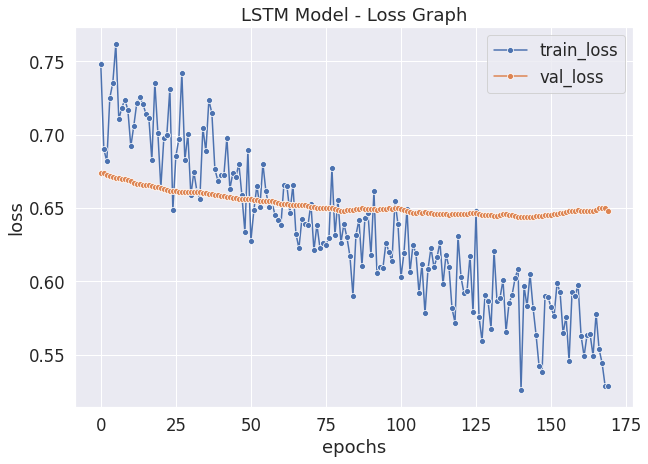

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.set(font_scale=1.5) 
sns.lineplot(y=history.history['loss'], x=range(0,170),marker='o',label="train_loss")
sns.lineplot(y=history.history['val_loss'], x=range(0,170), marker='o',label="val_loss")

plt.legend()

plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("LSTM Model - Loss Graph")
plt.show()

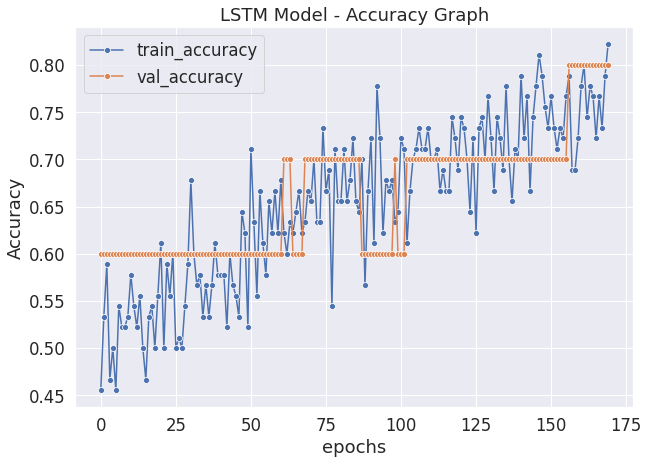

In [51]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5) 
sns.lineplot(y=history.history['accuracy'], x=range(0,170),marker='o',label="train_accuracy")
sns.lineplot(y=history.history['val_accuracy'], x=range(0,170), marker='o',label="val_accuracy")

plt.legend()

plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.title("LSTM Model - Accuracy Graph")
plt.show()

### Observations:-
- After lot of experimentation with batchsize, epochs, lr , optimizers,lstm units, this model seems to perform reasonably well.
- Train accuracy of around 82% achieved.
- Validation accuracy of around 80% achieved which seems good. As per the graph one reason for constant val accuracy for some time could be less amount of data taken for val. But thats the trade-off done to have more training data.
- This shows LSTM model would work phenomenally well if we could have more data. To conclude this model works best for this data among all other considered.


In [ ]:
################################################# THE END ###################################################################